#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2018


# Homework 1:  Basic Machine Learning + Learning to Rank 

### 100 points [5% of your final grade]

### Due: Monday, February 12 by 11:59pm

*Goals of this homework:* In this homework you will get hands-on experience with (i) the basics of machine learning (e.g. train/test data, cross-validation, different classifiers) and interpreting results; and (ii) learning to rank.

*Submission Instructions:* To submit your homework, rename this notebook as UIN_hw#.ipynb. For example, this homework submission would be: YourUIN_hw1.ipynb. Submit this notebook via ecampus. Your notebook should be completely self-contained, with the results visible in the notebook. 

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after Thursday, February 15 at 11:59pm.

*Collaboration policy:* You are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. You may post on Piazza, search StackOverflow, etc. But if you do get help in this way, you must inform us by **filling out the Collaboration Declarations at the bottom of this notebook**. 

*Example: I found helpful code on stackoverflow at https://stackoverflow.com/questions/11764539/writing-fizzbuzz that helped me solve Problem 2.*

The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.

# Part 1: Basics of ML (70 points)

For this part, we're going to get familiar with scikit-learn (a great ML toolkit that is very popular) and the major issues in training a model, testing it, and interpreting the results. Our goal in this assignment is to build a classifier to determine if a Yelp review is "food-relevant" or not.

## Dataset: Yelp review data

First, you will need to download the training_data.json file from the Resources tab on Piazza, a collection of 40,000 json-encoded Yelp reviews we sampled from the [Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge).

You'll see that each line corresponds to a review on a particular business. The label (class) information of each review is in the "label" field. It is **either "Food-relevant" or "Food-irrelevant"**.

## Part 1.1: Parsing Yelp (15 points)

For this first part, we will build a parser for extracting tokens from the **review text** only. First, you should tokenize each review using **whitespaces and punctuations as delimiters**. Do not remove stopwords. You should apply casefolding (lower case everything) and use the [nltk Porter stemmer](http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) ... you may need to install nltk if you don't have it already. 

In [3]:
import json
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

#Loading data from Json File
loaded_data=[]
with open('training_data.json') as f:
    for review in f:
        loaded_data.append(json.loads(review))
        
#Tokenisation of Reviews based on delimiters and LowerCase Conversion
tokenised_lowercased_data=[]
for i in loaded_data:
    review_text= i['text']
    review_label=i['label']
    lowercase_text= review_text.lower()
    tokenised_text= re.findall(r'[a-zA-Z]+', lowercase_text)
    tokenised_lowercased_data.append([review_label,tokenised_text])
    
#Stemming Using NLTK Porter Stemmer
ps = PorterStemmer()
for tokenised_review in range(len(tokenised_lowercased_data)): 
    for word in range(len(tokenised_lowercased_data[tokenised_review][1])):
        tokenised_lowercased_data[tokenised_review][1][word]=ps.stem(tokenised_lowercased_data[tokenised_review][1][word])
        tokenised_lowercased_data[tokenised_review][1][word]=tokenised_lowercased_data[tokenised_review][1][word].encode('utf-8')
# print tokenised_lowercased_data[0]
# print tokenised_lowercased_data[1]
print "Done"


Done


### Unique tokens?

Once you have your parser working, you should report here the size of your feature space. That is, how many unique tokens do you find?

In [4]:
# your code here
#Printing the length of feature space/Unique tokens
feature_space={}
for reviews in tokenised_lowercased_data:
    for word in reviews[1]:
        if feature_space.get(word,0)==0:
            feature_space[word]=1
        else:
            feature_space[word]+=1
print len(feature_space)

34969


### The Most Popular Words

Great, now we can tokenize the documents. Let's make a list of the most popular words in our reviews. For this step, you should maintain a count of how many times each word occurs. Then you should print out the top-20 words in your reviews.

Your output should look like this:

Rank Token Count

1 awesome 78

... ...

In [5]:
# your code here
import operator
#Sorting the token Dictionary and Printing Top 20 tokens
sorted_tokens = sorted(feature_space.items(), key=operator.itemgetter(1),reverse=True)
print '{0:4s} {1:5s} {2:4s}'.format("Rank", "Token","Count")
for i in range(20):
    print '{0:4d} {1:5s} {2:4d}'.format(i+1, sorted_tokens[i][0], sorted_tokens[i][1])

Rank Token Count
   1 the   246313
   2 i     168950
   3 and   168590
   4 a     134996
   5 to    128141
   6 it    78867
   7 of    76237
   8 wa    74021
   9 is    63499
  10 for   60869
  11 in    60535
  12 that  50804
  13 my    50565
  14 you   45882
  15 they  43635
  16 thi   39940
  17 with  39340
  18 have  39082
  19 but   37967
  20 on    35388


### Zipf's Law

Recall in class our discussion of Zipf's law. Let's see if this law applies to our Yelp reviews. You should use matplotlib to plot the log-base10 term counts on the y-axis versus the log-base10 rank on the x-axis. Your aim is to create a figure like the one in Figure 5.2 of the textbook.

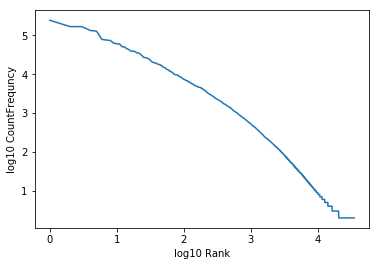

In [7]:
# your code here
import matplotlib.pyplot as plt
import numpy as np

#Creating Numpy arrays for axis data
y_axis = np.array([x[1] for x in sorted_tokens])
x_axis = np.array([i for i in range(len(sorted_tokens))])

#Adding 1 to everything to remove divison by 0
y_axis = y_axis+1
x_axis= x_axis+1

#Log 10
y_axis = np.log10(y_axis)
x_axis = np.log10(x_axis)

#Plotting
plt.xlabel("log10 Rank")
plt.ylabel("log10 CountFrequncy")
plt.plot(x_axis,y_axis)
plt.show()

What do you observe? Is this consistent with Zipf's law?

As shown above, the graph is rapidly decreasing. This means that the frequncy of words is decreasing very fast as their rank(in terms of frequency across the reviews) decreases. This is consitent with the Zipf's law which is mainly used to check the distribution of tokens across documents/reviews. It says that if the term with rank 1 has maximum frequqncy, than term with rank 2 will have half its frequqncy and so on, basically stating that frequency decreases rapidly with rank.

## Part 1.2: Feature Represenation (10 points)

In this part you will build feature vectors for each review. This will be input to our ML classifiers. You should call your parser from earlier, using all the same assumptions (e.g., casefolding, stemming). Each feature value should be the term count for that review.

In [8]:
# your code

#Created Feature Vectors and Label Vector using SkLearn Vectorizer on the stemmed data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
all_reviews=[]
for i in range(len(tokenised_lowercased_data)):
    all_reviews.append(' '.join(tokenised_lowercased_data[i][1]))
vectorizer.fit(all_reviews)
review_samples=[]
labels=[]
for i in range(len(tokenised_lowercased_data)):
    review_samples.append(' '.join(tokenised_lowercased_data[i][1]))
    if tokenised_lowercased_data[i][0]== 'Food-irrelevant':
        labels.append("Food-irrelevant")
    else:
        labels.append("Food-relevant")    
feature_vectors=vectorizer.transform(review_samples).toarray()
# print feature_vectors
# np.set_printoptions(threshold='nan')
# print feature_vectors[0]
# print feature_vectors[1]
# print len(feature_vectors)
# print len(feature_vectors[0])
# print labels
# print len(labels)
print "Done"




Done


## Part 1.3: Machine Learning Basics (30 points)

In this part you will evaluate a bunch of classifiers -- kNN, Decision tree, Naive Bayes, and SVM -- on the feature vectors generated in the previous task in two different settings. **You do not need to implement any classifier from scratch. You may use scikit-learn's built-in capabilities.**

### Setting 1: Splitting data into train-test 

In the first setting, you should treat the first 70% of your data as training. The remaining 30% should be for testing. 

### Setting 2: Using 5 fold cross-validation

In the second setting, use 5-folk cross-validation. 

### What to report

* Report the overall accuracy for both settings.
* For the class "Food-relevant", report the precision and recall for both settings.
* For the class "Food-irrelevant", report the precision and recall for both settings.

In [9]:
# your code here...plus add cells for reporting your results
from __future__ import division
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Converting to Sparse Matrix
feature_vectors= csr_matrix(feature_vectors)
labels = np.array(labels)
target_names=["Food-irrelevant","Food-relevant"] # 0:"Food Irrelevant", 1:"Food Relevant"

#kNN
def knn(X_train, y_train,X_test,y_test):
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    return [accuracy_score(y_test, pred),
            precision_score(y_test, pred, average=None,labels=["Food-irrelevant"]),
            recall_score(y_test, pred, average=None,labels=["Food-irrelevant"]),
            precision_score(y_test, pred, average=None,labels=["Food-relevant"]),
            recall_score(y_test, pred, average=None,labels=["Food-relevant"])]   

#DecisionTreeClassifier
def decisionTree(X_train, y_train,X_test,y_test):
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    return [accuracy_score(y_test, pred),
            precision_score(y_test, pred, average=None,labels=["Food-irrelevant"]),
            recall_score(y_test, pred, average=None,labels=["Food-irrelevant"]),
            precision_score(y_test, pred, average=None,labels=["Food-relevant"]),
            recall_score(y_test, pred, average=None,labels=["Food-relevant"])] 

#NaiveBayes
def naive_bayes(X_train, y_train,X_test,y_test):
    nb = MultinomialNB()
    nb.fit(X_train,y_train)
    pred = nb.predict(X_test)
    return [accuracy_score(y_test, pred),
            precision_score(y_test, pred, average=None,labels=["Food-irrelevant"]),
            recall_score(y_test, pred, average=None,labels=["Food-irrelevant"]),
            precision_score(y_test, pred, average=None,labels=["Food-relevant"]),
            recall_score(y_test, pred, average=None,labels=["Food-relevant"])] 

#SVM
def svm(X_train, y_train,X_test,y_test):
    svm = SVC()
    svm.fit(X_train,y_train)
    pred = svm.predict(X_test)
    return [accuracy_score(y_test, pred),
            precision_score(y_test, pred, average=None,labels=["Food-irrelevant"]),
            recall_score(y_test, pred, average=None,labels=["Food-irrelevant"]),
            precision_score(y_test, pred, average=None,labels=["Food-relevant"]),
            recall_score(y_test, pred, average=None,labels=["Food-relevant"])] 

def display_results(result):
    print "Accuracy = "+str(result[0])
    print "Precision for Food Irrelevant = " + str(result[1])
    print "Recall for Food Irrelevant = " + str(result[2])
    print "Precision for Food Relevant = " + str(result[3])
    print "Recall for Food Relevant = " + str(result[4])



In [10]:
#Splitting into 70% training and 30% test data
X_train, X_test, y_train, y_test = train_test_split(feature_vectors, labels, test_size=0.3, random_state=42)
print "70%-30% Split Results"
print
print "KNN Classfier"
display_results(knn(X_train, y_train,X_test,y_test))
print
print "Naive Bayes Classfier"
display_results(naive_bayes(X_train, y_train,X_test,y_test))
print
print "Decision Tree Classfier"
display_results(decisionTree(X_train, y_train,X_test,y_test))
print
print "SVM Classfier"
display_results(svm(X_train, y_train,X_test,y_test))
print

70%-30% Split Results

KNN Classfier
Accuracy = 0.7408333333333333
Precision for Food Irrelevant = [0.82866894]
Recall for Food Irrelevant = [0.60710118]
Precision for Food Relevant = [0.69007232]
Recall for Food Relevant = [0.87452091]

Naive Bayes Classfier
Accuracy = 0.9473333333333334
Precision for Food Irrelevant = [0.95413776]
Recall for Food Irrelevant = [0.9398233]
Precision for Food Relevant = [0.94073223]
Recall for Food Relevant = [0.95484086]

Decision Tree Classfier
Accuracy = 0.8813333333333333
Precision for Food Irrelevant = [0.88297338]
Recall for Food Irrelevant = [0.87914652]
Precision for Food Relevant = [0.87970798]
Recall for Food Relevant = [0.88351941]

SVM Classfier
Accuracy = 0.86875
Precision for Food Irrelevant = [0.83333333]
Recall for Food Irrelevant = [0.9218203]
Precision for Food Relevant = [0.91256525]
Recall for Food Relevant = [0.81569738]



In [14]:
#K-Fold Cross Validation for KNN
kf = KFold(n_splits=5)
knnFolds=[0,0,0,0,0]

for train_index, test_index in kf.split(feature_vectors):
    X_train, X_test = feature_vectors[train_index], feature_vectors[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    knnFolds=[sum(n) for n in zip(*[knnFolds,knn(X_train, y_train,X_test,y_test)])]
    
print "KNN Classfier"
display_results([n/5 for n in knnFolds])
print


KNN Classfier
Accuracy = 0.8551249999999999
Precision for Food Irrelevant = [0.87072768]
Recall for Food Irrelevant = [0.80388699]
Precision for Food Relevant = [0.7209919]
Recall for Food Relevant = [0.73127754]



/Users/Mragank/anaconda2/envs/cs670/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [15]:
#K-Fold Cross Validation for Naive Bayes
kf = KFold(n_splits=5)
nbFolds=[0,0,0,0,0]

for train_index, test_index in kf.split(feature_vectors):
    X_train, X_test = feature_vectors[train_index], feature_vectors[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    nbFolds=[sum(n) for n in zip(*[nbFolds,naive_bayes(X_train, y_train,X_test,y_test)])]
    
print "Naive Bayes Classfier"
display_results([n/5 for n in nbFolds])
print

Naive Bayes Classfier
Accuracy = 0.917025
Precision for Food Irrelevant = [0.88144026]
Recall for Food Irrelevant = [0.92574427]
Precision for Food Relevant = [0.76549791]
Recall for Food Relevant = [0.73680535]



In [16]:
#K-Fold Cross Validation for Decision Tree Classifier
kf = KFold(n_splits=5)
decisionTreeFolds=[0,0,0,0,0]

for train_index, test_index in kf.split(feature_vectors):
    X_train, X_test = feature_vectors[train_index], feature_vectors[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    decisionTreeFolds=[sum(n) for n in zip(*[decisionTreeFolds,decisionTree(X_train, y_train,X_test,y_test)])]
    
print "Decision Tree Classfier"
display_results([n/5 for n in decisionTreeFolds])
print

Decision Tree Classfier
Accuracy = 0.8679
Precision for Food Irrelevant = [0.83446453]
Recall for Food Irrelevant = [0.86324234]
Precision for Food Relevant = [0.73247818]
Recall for Food Relevant = [0.70272387]



In [ ]:
#K-Fold Cross Validation for SVM
kf = KFold(n_splits=5)
svmFolds=[0,0,0,0,0]
for train_index, test_index in kf.split(feature_vectors):
    X_train, X_test = feature_vectors[train_index], feature_vectors[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    arr=svm(X_train, y_train,X_test,y_test)
    print arr
    svmFolds=[sum(n) for n in zip(*[svmFolds,arr])]
    
print "SVM Classfier"
display_results([n/5 for n in svmFolds])
print

## Part 1.4: Analyzing your results (5 points) 

OK, now that you have tried four different classifiers, what do you observe? Any conclusions you can draw? Give us one or two paragraphs summarizing your findings.

We have tried four classifiers as Knn, Naive Bayes, Svm and Decison Tree. The first observation we can make is that naive bayes performs the best in both the settings whether we split it in 70-30 ratio or use cross validation. This may be because we have a really large number of features. We are using Bag-Of-Words model and that created a really large feature space. 

This large feature space not only makes naive-bayes perform the best, but it is also the fastest. Such large feature space is possibly creating really complex hyper planes due to which models like svm take large amount of time to train. The most important thing about these accuracy and precison measures is that we haven't used any complicated or smart features but a basic BOW model. It has been through multiple research papers that in a BOW model, Naive Bayes performs usually the best and it's hard to beat the performace. 

Also, we that in K-fold cross validation accuracies for Decision Tree, Naive Bayes and SVM goes down because we are averaging over multiple results where some may be performing worse but in case of KNN, the accuracy goes up.  I think that this is because of irregular data distribution. Since we used default settings while splitting and did not shuffle or proper mixing techniques, there is a very high chance that while splitting we took majority of one class in the training split while other class in testing split. 

So based on this data and the results, I can say that it's important to balance the data in term of class distribution and also randomize the order. Specially, in K-fold svm we see a serious drop in accuracy which is due to very low precision and recall values in relevant food items. This is a clear indication of uneven data distribution cause I found that we get a high accuray for SVM in only one fold where that fold probably has better distribution.

## Part 1.5: Improving your classifier (10 points)

I think we can do better! In this part, your job is to create new features that you can think can help improve your classifier. You may choose to use new weightings for your words, new derived features (e.g., count of 3-letter words), or whatever you like. You may also add in the extra features in the json: funny, useful, cool. You will need to experiment with different approaches ... once you finalize on your best approach, include the features here with a description (that is, tell us what the feature means). Then give us your classifier results!

New Features
I have made three modifications in the above BOW model

First Feature Detail: I have added weightage to all the words using TF-IDF. It ensures that very frequent words which are found in most of the reiews does not adversely affect the classification. It assigns high weights to less frequent words and low weights vice versa.

Second Feature Detail: I have removed all the stop words from the reviews. As we saw previously, majority of the words were stop words that don't really make a difference in classification so removing them reduces the feature space and helps relevant words to affect the model more in the correct way.

Third Feature Detail: I have used feature elimination to reduce the number of features from 30000 to 1000 thus reducing the number of features to mere 30% of the original. I selected the best 1000 features of all and used only them.
The code and the results after adding these 3 features in a compunded manner are given below.

Results are shown below with the code. We can see that with every feature, accuracy for all the classfiers kept going up so we can say that all the new introduced modifications were good features.

In [11]:
# your code here ... add as many cells as you need for features, results, and discussion.

#TF-IDF for Word Weightage Assignment
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
all_reviews=[]
for i in range(len(tokenised_lowercased_data)):
    all_reviews.append(' '.join(tokenised_lowercased_data[i][1]))
tf.fit(all_reviews)
review_samples=[]
labels=[]
for i in range(len(tokenised_lowercased_data)):
    review_samples.append(' '.join(tokenised_lowercased_data[i][1]))
    if tokenised_lowercased_data[i][0]== 'Food-irrelevant':
        labels.append("Food-irrelevant")
    else:
        labels.append("Food-relevant")   
feature_vectors=tf.transform(review_samples).toarray()
feature_vectors= csr_matrix(feature_vectors)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(feature_vectors, labels, test_size=0.3, random_state=42)
print "Split Results with TF-IDF Weightage"
print
print "KNN Classfier"
display_results(knn(X_train, y_train,X_test,y_test))
print
print "Naive Bayes Classfier"
display_results(naive_bayes(X_train, y_train,X_test,y_test))
print
print "Decision Tree Classfier"
display_results(decisionTree(X_train, y_train,X_test,y_test))
print



Split Results with TF-IDF Weightage

KNN Classfier
Accuracy = 0.9070833333333334
Precision for Food Irrelevant = [0.96355353]
Recall for Food Irrelevant = [0.84614102]
Precision for Food Relevant = [0.86289364]
Recall for Food Relevant = [0.96800533]

Naive Bayes Classfier
Accuracy = 0.9499166666666666
Precision for Food Irrelevant = [0.95270044]
Recall for Food Irrelevant = [0.94682447]
Precision for Food Relevant = [0.94716794]
Recall for Food Relevant = [0.95300783]

Decision Tree Classfier
Accuracy = 0.8798333333333334
Precision for Food Irrelevant = [0.88339223]
Recall for Food Irrelevant = [0.87514586]
Precision for Food Relevant = [0.87634142]
Recall for Food Relevant = [0.88451925]



In [12]:
#Removing all stop words from TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english')
all_reviews=[]
for i in range(len(tokenised_lowercased_data)):
    all_reviews.append(' '.join(tokenised_lowercased_data[i][1]))
tf.fit(all_reviews)
review_samples=[]
labels=[]
for i in range(len(tokenised_lowercased_data)):
    review_samples.append(' '.join(tokenised_lowercased_data[i][1]))
    if tokenised_lowercased_data[i][0]== 'Food-irrelevant':
        labels.append("Food-irrelevant")
    else:
        labels.append("Food-relevant")   
feature_vectors=tf.transform(review_samples).toarray()
feature_vectors= csr_matrix(feature_vectors)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(feature_vectors, labels, test_size=0.3, random_state=42)
print "Split Results with Stop Words Removed from TF-IDF"
print
print "KNN Classfier"
display_results(knn(X_train, y_train,X_test,y_test))
print
print "Naive Bayes Classfier"
display_results(naive_bayes(X_train, y_train,X_test,y_test))
print
print "Decision Tree Classfier"
display_results(decisionTree(X_train, y_train,X_test,y_test))
print


Split Results with Stop Words Removed from TF-IDF

KNN Classfier
Accuracy = 0.9046666666666666
Precision for Food Irrelevant = [0.95827827]
Recall for Food Irrelevant = [0.84614102]
Precision for Food Relevant = [0.86230046]
Recall for Food Relevant = [0.9631728]

Naive Bayes Classfier
Accuracy = 0.9511666666666667
Precision for Food Irrelevant = [0.95663911]
Recall for Food Irrelevant = [0.94515753]
Precision for Food Relevant = [0.94582579]
Recall for Food Relevant = [0.9571738]

Decision Tree Classfier
Accuracy = 0.89375
Precision for Food Irrelevant = [0.90307167]
Recall for Food Irrelevant = [0.88214702]
Precision for Food Relevant = [0.88485342]
Recall for Food Relevant = [0.90534911]



In [13]:
#Reducing the number of features from 30000 to 1000 best features.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english')
all_reviews=[]
for i in range(len(tokenised_lowercased_data)):
    all_reviews.append(' '.join(tokenised_lowercased_data[i][1]))
tf.fit(all_reviews)
review_samples=[]
labels=[]
for i in range(len(tokenised_lowercased_data)):
    review_samples.append(' '.join(tokenised_lowercased_data[i][1]))
    if tokenised_lowercased_data[i][0]== 'Food-irrelevant':
        labels.append("Food-irrelevant")
    else:
        labels.append("Food-relevant")   
feature_vectors=tf.transform(review_samples).toarray()
newfeature_vectors = SelectKBest(chi2, k=1000).fit_transform(feature_vectors, labels)
feature_vectors= csr_matrix(feature_vectors)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(feature_vectors, labels, test_size=0.3, random_state=42)
print "Split Results with K-Best(1000) Features Only"
print
print "KNN Classfier"
display_results(knn(X_train, y_train,X_test,y_test))
print
print "Naive Bayes Classfier"
display_results(naive_bayes(X_train, y_train,X_test,y_test))
print
print "Decision Tree Classfier"
display_results(decisionTree(X_train, y_train,X_test,y_test))
print


Split Results with K-Best(1000) Features Only

KNN Classfier
Accuracy = 0.9046666666666666
Precision for Food Irrelevant = [0.95827827]
Recall for Food Irrelevant = [0.84614102]
Precision for Food Relevant = [0.86230046]
Recall for Food Relevant = [0.9631728]

Naive Bayes Classfier
Accuracy = 0.9511666666666667
Precision for Food Irrelevant = [0.95663911]
Recall for Food Irrelevant = [0.94515753]
Precision for Food Relevant = [0.94582579]
Recall for Food Relevant = [0.9571738]

Decision Tree Classfier
Accuracy = 0.893
Precision for Food Irrelevant = [0.9027849]
Recall for Food Irrelevant = [0.88081347]
Precision for Food Relevant = [0.8836831]
Recall for Food Relevant = [0.90518247]



### BONUS: What are the most informative features in distinguishing these two classes?

In [19]:
# Your code here

# Part 2: Learning to Rank (30 points)

For this part, we're going to play with some Microsoft LETOR data that has query-document relevance judgments. Let's see how learning to rank works in practice. 

First, you will need to download the MQ2008.zip file from the Resources tab on Piazza. This is data from the [Microsoft Research IR Group](https://www.microsoft.com/en-us/research/project/letor-learning-rank-information-retrieval/).

The data includes 15,211 rows. Each row is a query-document pair. The first column is a relevance label of this pair (0,1 or 2--> the higher value the more related), the second column is query id, the following columns are features, and the end of the row is comment about the pair, including id of the document. A query-document pair is represented by a 46-dimensional feature vector. Features are a numeric value describing a document and query such as TFIDF, BM25, Page Rank, .... You can find compelete description of features from [here](https://arxiv.org/ftp/arxiv/papers/1306/1306.2597.pdf).

The good news for you is the dataset is ready for analysis: It has already been split into 5 folds (see the five folders called Fold1, ..., Fold5).

For this assignment, we're going to leave our favorite scikit-learn and instead use [SVM-rank](https://www.cs.cornell.edu/people/tj/svm_light/svm_rank.html). This is the basic ranking SVM we talked about in class. You'll see that SVM-rank considers pairwise relevance between docs -- so based on the training data it will transform the data into pairs -- like D1 > D2 and then learn a separator.


## Part 2.1: Optimizing SVM-Rank (15 points)

First, you should explore how the different parameters affect the quality of the Ranking SVM. You'll see that you can vary the kernel function, the loss function and so forth. 

You should run SVM-Rank using the default options over each of the five folds. You should find the error on the test set (for example, depending on your settings, svm_rank_classify will give you the zero/one error statistics (that is, the number of correct pairs and the number of incorrect pairs). Report the average. 

Then try different parameters and report how they impact the quality of results. 

I ran SVM-rank for all the folds and here are zero-one error results for all the folds along with the average:
Fold 1 Zero/one-error on test set: 58.97%
Fold 2 Zero/one-error on test set: 57.32%
Fold 3 Zero/one-error on test set: 61.15% 
Fold 4 Zero/one-error on test set: 60.51% 
Fold 5 Zero/one-error on test set: 64.97%
Average Zero/one-error: 60.58%

All the above error values are for default settings 

I played around with the C-Values(trade-off between training error and margin), loss functions and different kernal options.  Here are my observations:
For C-Values, here are some error values for different C values:
C= 0.01 Error=56.05%
C= 1    Error=55.41%
C= 3    Error=57.32%
C= 6    Error=56.69% 
C= 9    Error=57.96% 
C=15    Error=56.05%
So for values of C we can observe that th error percentage kept on increasing and then it decreased as we kept increasing the value of C

I also ran the SVM-rank using different kernals(t value). I saw that linear kernal(t=0) gives the minimum error value. 
For other kernal values, we got the following error values:
t=2(Radial Basis) Error= 63.69%
t=3(Sigmoid)      Error= 64.2%


## Part 2.1: Noise! (15 points)

Now we're going to investigate whether the ranking SVM is easily influenced by noisy features. For example, what if some of the features you have are in error? Or what if you downloaded only a portion of a page to calculate a feature? (so the count of inlinks would be wrong)? 

In this case, add some noise to the features. What happens to the results? You may choose to add random noise throughout, noise to a single feature, noise to multiple features, etc. The choices are up to you. We aim to see what kind of exploration you conduct and what you conclude.

I added noise to the features in the following manners:
1. Added random values between (0,1) to first 18 features
2. Added random values between (0,1) to first 35 features
3. Added random values between (0,10) to first 15 features
4. Added random values between (1,10) to all features
5. Added only 60% of queries (Incomplete File Download case)
Observation:  Adding Noise does not really impact the Zero/One Error Values. the error value reamined contant as 56.05%. It deflected to 56.69% in case 2nd change as mentioned above but that is very marginal difference and I wont call it any substantial change due to noise. 

I added noise using a python code which I have added below. It will not run here since it needs input training files to modify but you can get the idea regarding how I modified the features.

In [ ]:
import random

newFile=open("/Users/Mragank/Desktop/MQ2008_2/Fold2/newtrain.txt",'w+')
with open('/Users/Mragank/Desktop/MQ2008_2/Fold2/train.txt') as f:
    for review in f:
        query_pair=review.split()
        modified_line=[]
        #Change the value of this range to modify more features maximum being 46.
        for i in range(2,30):
            val=query_pair[i].split(':')
            # Change the values in uniform to add random noise
            v= float(val[1])+random.uniform(0,10)
            newpair=':'.join([val[0],str(v)])
            modified_line.append(newpair)
        for i in range(len(query_pair)):
            if(i>=2 and i<30):
                newFile.write(modified_line[i-2]+" ")
            else:
                newFile.write(query_pair[i]+" ")
        newFile.write("\n")
newFile.close()

## Collaboration declarations

*If you collaborated with anyone (see Collaboration policy at the top of this homework), you can put your collaboration declarations here.*